In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
# independent and dependant features
X=df.drop(["FWI"],axis=1)
y=df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

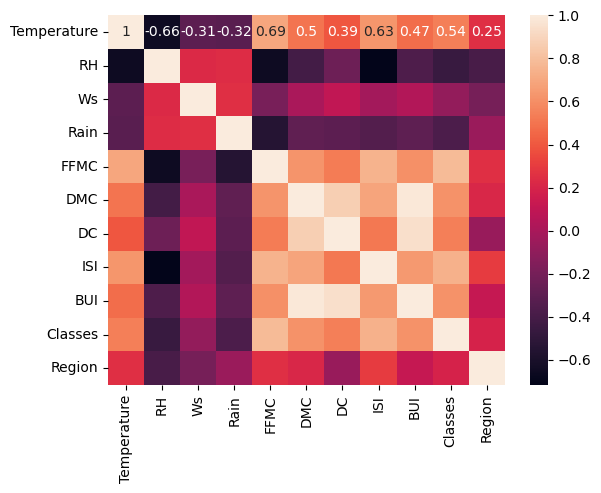

In [13]:
sns.heatmap(X_train.corr(),annot=True)

In [14]:
# check for multicolinearity
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [16]:
corr_features=correlation(X_train,0.85)

In [17]:

# drop the features 
X_train.drop(corr_features,axis=1,inplace=True)

X_test.drop(corr_features,axis=1,inplace=True)

X_train.shape,X_test.shape

((182, 9), (61, 9))

# Feature Scaling or Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [20]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [21]:
X_train[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region']]=X_train[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region']].astype(float)

In [22]:
X_test.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [23]:
X_test[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region']]=X_test[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region']].astype(float)

Text(0.5, 1.0, 'X_train After The Scaled Data ')

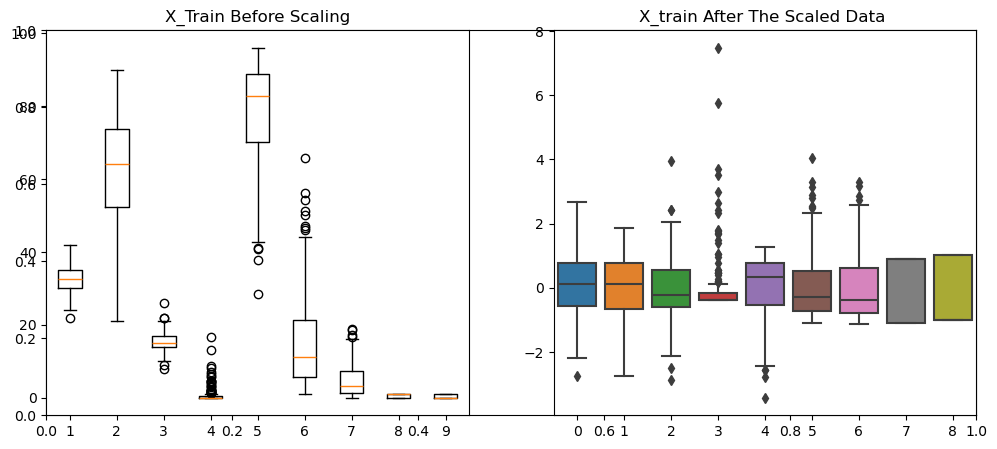

In [24]:
# Box plots to understand the Effect of standardscaler

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(data=X_train,x=X_train[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes','Region']])
plt.title("X_Train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After The Scaled Data ")

# Regression

The Mean Absolute Erorr is: 0.5468236465249993
The Mean Squared Erorr is: 0.6742766873791594
The R2 Score is: 0.9847657384266951


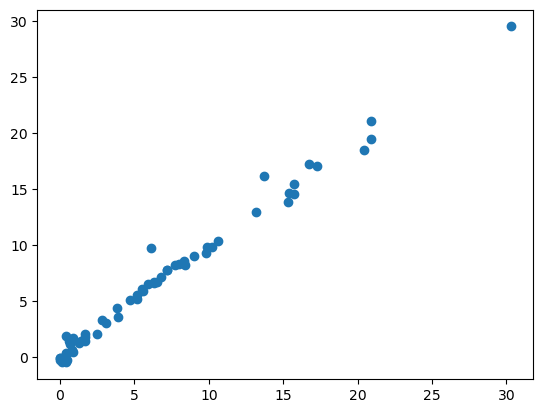

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

# Lasso 

The Mean Absolute Erorr is: 1.1331759949144085
The Mean Squared Erorr is: 2.248345891897475
The R2 Score is: 0.9492020263112388


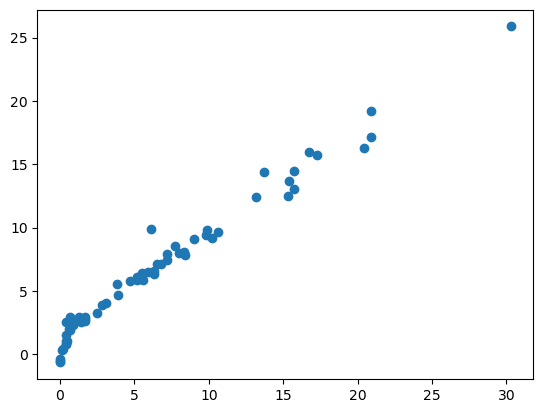

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

# Cross validation Lasso

The Mean Absolute Erorr is: 0.6199701158263436
The Mean Squared Erorr is: 0.7924995554743635
The R2 Score is: 0.9820946715928275


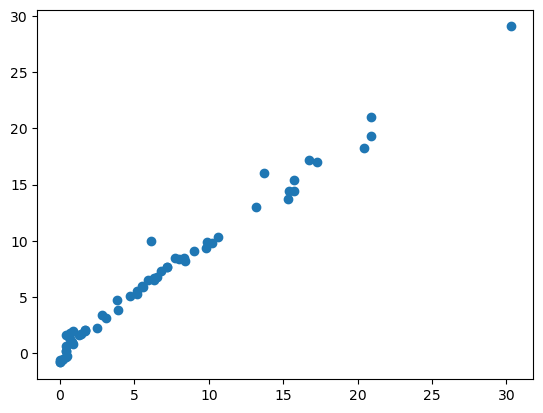

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

In [28]:
lassocv.alpha_

0.05725391318234405

In [29]:
lassocv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

In [30]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

# Ridge Regression 

 minimizes the objective function ;
|| y - Xw || ^2_2 + alpha ||w||^2_2

The Mean Absolute Erorr is: 0.5642305340105717
The Mean Squared Erorr is: 0.6949198918152085
The R2 Score is: 0.9842993364555513


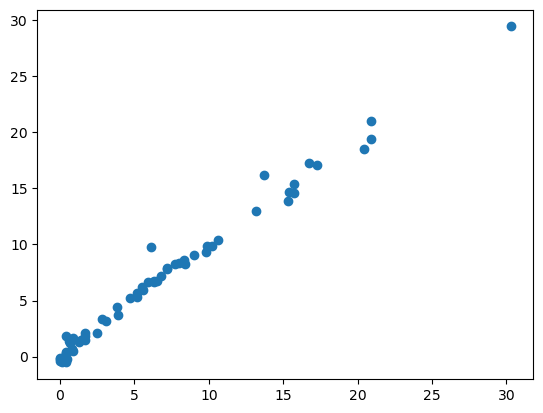

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

The Mean Absolute Erorr is: 0.5642305340105717
The Mean Squared Erorr is: 0.6949198918152085
The R2 Score is: 0.9842993364555513


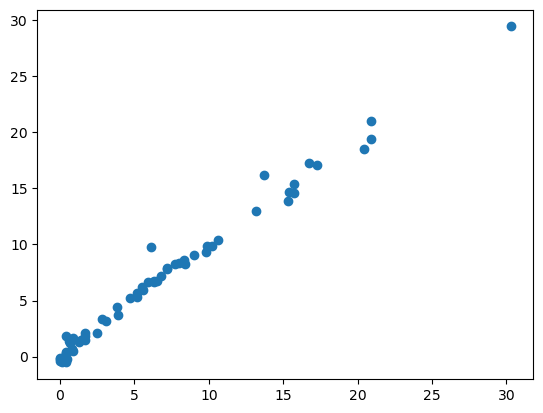

In [48]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridgeCV=RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred=ridgeCV.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

In [50]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

The Mean Absolute Erorr is: 1.8822353634896
The Mean Squared Erorr is: 5.517251101025224
The R2 Score is: 0.8753460589519703


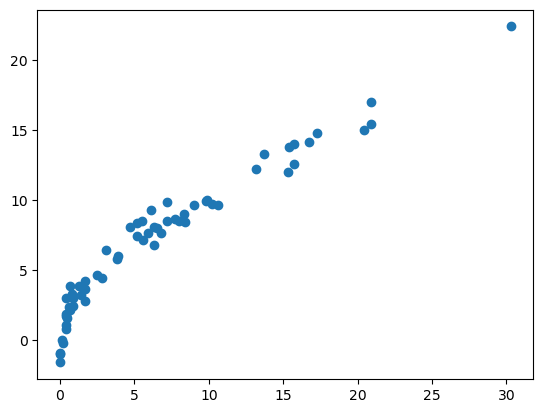

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

The Mean Absolute Erorr is: 0.6575946731430905
The Mean Squared Erorr is: 0.8222830416276268
The R2 Score is: 0.9814217587854941


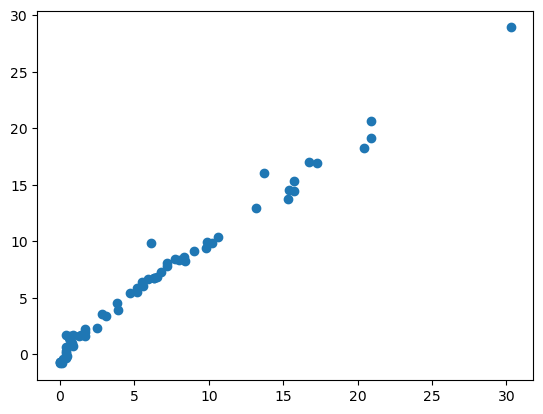

In [52]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elasticCV=ElasticNetCV(cv=5)
elasticCV.fit(X_train_scaled,y_train)
y_pred=elasticCV.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('The Mean Absolute Erorr is:',mae)
print('The Mean Squared Erorr is:',mse)
print('The R2 Score is:',score)
plt.scatter(y_test,y_pred)

In [53]:
# Pickling the Model and Preprocessing 

In [54]:
scaler

StandardScaler()

In [55]:
ridge

RidgeCV(cv=5)

In [58]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
            